In [1]:
# Instalación de bibliotecas
!pip install tensorflow pandas matplotlib opencv-python scikit-learn


In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/root/.kaggle"
!mkdir -p /root/.kaggle
!mv kaggle.json /root/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d msambare/fer2013
!kaggle datasets download -d tapakah68/facial-emotion-recognition
!kaggle datasets download -d dilkushsingh/facial-emotion-dataset
!kaggle datasets download -d samaneheslamifar/facial-emotion-expressions
!kaggle datasets download -d missaouimohamedamine/face-emotion-dataset


Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 80% 48.0M/60.3M [00:00<00:00, 267MB/s]
100% 60.3M/60.3M [00:00<00:00, 246MB/s]
Dataset URL: https://www.kaggle.com/datasets/tapakah68/facial-emotion-recognition
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 97% 421M/433M [00:01<00:00, 277MB/s]
100% 433M/433M [00:01<00:00, 253MB/s]
Dataset URL: https://www.kaggle.com/datasets/dilkushsingh/facial-emotion-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
 68% 41.0M/60.7M [00:00<00:00, 236MB/s] 
100% 60.7M/60.7M [00:00<00:00, 252MB/s]
Dataset URL: https://www.kaggle.com/datasets/samaneheslamifar/facial-emotion-expressions
License(s): unknown
 97% 117M/121M [00:00<00:00, 256MB/s] 
100% 121M/121M [00:00<00:00, 252MB/s]
Dataset URL: https://www.kaggle.com/datasets/missaouimohamedamine/face-emotion-dataset
License(s): apache-2.0
 76% 93.0M/123M [00:00<00:00, 202MB/s]
100% 123M/123M [00:00<00:00, 201MB/s] 


In [3]:
#Descomprimimos los archivos
import zipfile
import os

download_dir = '/content/'

zip_files = [f for f in os.listdir(download_dir) if f.endswith('.zip')]

for zip_file in zip_files:
    zip_path = os.path.join(download_dir, zip_file)
    extract_dir = os.path.join(download_dir, zip_file.replace('.zip', ''))
    os.makedirs(extract_dir, exist_ok=True)

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)  # Extraer todos los archivos
    print(f"Descomprimido: {zip_file} en {extract_dir}")


Descomprimido: facial-emotion-expressions.zip en /content/facial-emotion-expressions
Descomprimido: facial-emotion-dataset.zip en /content/facial-emotion-dataset
Descomprimido: face-emotion-dataset.zip en /content/face-emotion-dataset
Descomprimido: fer2013.zip en /content/fer2013
Descomprimido: facial-emotion-recognition.zip en /content/facial-emotion-recognition


In [4]:
# Mapeo de las etiquetas a las nuevas categorías numeradas
label_mapping = {
    'angry': 0,       # angry -> 0
    'neutral': 1,      # neutral -> 1
    'disgust': 2,      # disgust -> 2
    'fear': 3,         # fear -> 3
    'happy': 4,        # happy -> 4
    'sad': 5,      # sad -> 5
    'surprise': 6,     # surprise -> 6
}

In [5]:
#Función para cargar imágenes
import os
import pandas as pd

# Función para cargar imágenes y etiquetarlas
def load_images_and_labels(dataset_path, label_mapping):
    image_paths = []
    labels = []

    # Recorrer las carpetas dentro del dataset
    for class_folder in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_folder)

        # Asegurarse de que es una carpeta (no un archivo)
        if os.path.isdir(class_path):
            # Normalizar el nombre de la carpeta a minúsculas
            normalized_class_folder = class_folder.lower()

            # Si la carpeta pertenece a alguna de las categorías con nombre variable
            if normalized_class_folder in ['angry', 'anger']:
                mapped_label = label_mapping['angry']
            elif normalized_class_folder in ['sad', 'sadness']:
                mapped_label = label_mapping['sad']
            elif normalized_class_folder in label_mapping:
                mapped_label = label_mapping[normalized_class_folder]
            else:
                print(f"Etiqueta no mapeada: {class_folder}")
                continue  # Si no se encuentra en el mapeo, se omite

            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                image_paths.append(img_path)
                labels.append(mapped_label)

    # Crear un DataFrame con las rutas de imágenes y las etiquetas mapeadas
    df = pd.DataFrame({'image_path': image_paths, 'label': labels})
    return df


In [6]:
#Esto se hace para el dataset que no tiene la misma estructura que los otros
#Dataset facial-emotion-recognition
# Diccionario de correcciones para los nombres de las imágenes
corrections = {
    'surprised': 'surprise',  # 'surprised' -> 'surprise'
    'anger': 'angry'          # 'anger' -> 'angry'
}

# Función para cargar imágenes y etiquetarlas
def load_images_and_labels_2(dataset_path, label_mapping, corrections):
    image_paths = []
    labels = []

    # Recorrer las carpetas dentro del dataset (cada carpeta es un sujeto)
    for subject_folder in os.listdir(dataset_path):
        subject_path = os.path.join(dataset_path, subject_folder)

        # Asegurarse de que es una carpeta (no un archivo)
        if os.path.isdir(subject_path):
            for img_name in os.listdir(subject_path):
                img_path = os.path.join(subject_path, img_name)

                # Usar el nombre de la imagen sin la extensión y convertirlo a minúsculas
                img_name_lower = img_name.lower().split('.')[0]

                # Corregir el nombre si tiene alguna de las variaciones que deben ser mapeadas
                if img_name_lower in corrections:
                    img_name_lower = corrections[img_name_lower]

                # Buscar el mapeo para la etiqueta
                mapped_label = label_mapping.get(img_name_lower, None)
                if mapped_label is None:
                    print(f"Etiqueta no mapeada: {img_name_lower} en la carpeta {subject_folder}")
                    continue  # Si la etiqueta no está mapeada, la imagen se omite

                image_paths.append(img_path)
                labels.append(mapped_label)

    # Crear un DataFrame con las rutas de imágenes y las etiquetas mapeadas
    df = pd.DataFrame({'image_path': image_paths, 'label': labels})
    return df



In [7]:
# Creamos dataframes con las etiquetas y rutas de cada dataset y leugo los unimos
dataset_paths = [
    '/content/fer2013/test',
    '/content/fer2013/train',
    '/content/facial-emotion-dataset/test_dir',
    '/content/facial-emotion-dataset/train_dir',
    '/content/face-emotion-dataset/test',
    '/content/face-emotion-dataset/train',
    '/content/facial-emotion-expressions/images/images/train',
    '/content/facial-emotion-expressions/images/images/validation'

]

dfs = []
for path in dataset_paths:
    if path == '/content/facial-emotion-recognition/images':
        df = load_images_and_labels_2(path, label_mapping, corrections)
    else:
        df = load_images_and_labels(path, label_mapping)
    dfs.append(df)

# Unir todos los DataFrames
df_combined = pd.concat(dfs, ignore_index=True)

# Verificar la distribución de las etiquetas
print(df_combined.head())
print(df_combined['label'].value_counts())


                                          image_path  label
0  /content/fer2013/test/neutral/PublicTest_69204...      1
1  /content/fer2013/test/neutral/PublicTest_93950...      1
2  /content/fer2013/test/neutral/PrivateTest_9908...      1
3  /content/fer2013/test/neutral/PrivateTest_9183...      1
4  /content/fer2013/test/neutral/PrivateTest_2283...      1
label
4    43950
1    31087
5    30507
3    25049
0    24663
6    19970
2     7849
Name: count, dtype: int64


In [8]:
# Verificar si las rutas de las imágenes son correctas
for index, row in df_combined.iterrows():
    if not os.path.exists(row['image_path']):
        print(f"¡Ruta no válida! {row['image_path']}")


<ipython-input-9-704aff9677a4>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_labels.index, y=conteo_labels.values, palette='viridis', order=orden_categorias)


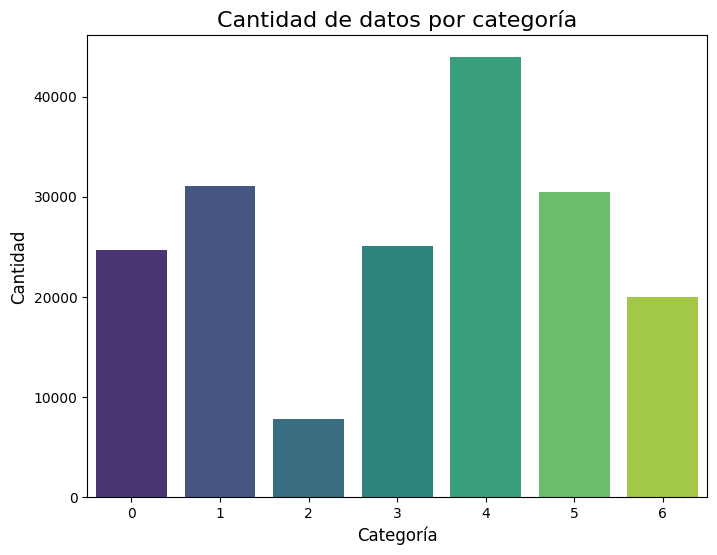

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener los conteos de las categorías
conteo_labels = df_combined['label'].value_counts()

# Ordenar las categorías (de 0 a 6 en este caso)
orden_categorias = list(range(7))  # Crea la lista de categorías en el orden deseado
conteo_labels = conteo_labels.reindex(orden_categorias, fill_value=0)  # Reorganiza y rellena con 0 si faltan categorías


# Gráfica usando seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=conteo_labels.index, y=conteo_labels.values, palette='viridis', order=orden_categorias)
plt.title('Cantidad de datos por categoría', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=0)
plt.show()


In [12]:
!pip install imgaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 59.8 MB/s eta 0:00:00


In [13]:
from imgaug import augmenters as iaa
import numpy as np
import cv2
import os

def load_and_preprocess_images(df, img_size=(48, 48), augment=False):
    images = []
    labels = []

    # Configurar augmenters
    aug = iaa.Sequential([
        iaa.Affine(rotate=(-15, 15)),
        iaa.Fliplr(0.5),
        iaa.Multiply((0.8, 1.2)),
    ]) if augment else None

    for _, row in df.iterrows():
        if not os.path.exists(row['image_path']):
            print(f"Imagen no encontrada: {row['image_path']}")
            continue

        # Leer la imagen
        img = cv2.imread(row['image_path'])
        if img is None:
            print(f"Error al cargar la imagen: {row['image_path']}")
            continue

        # Convertir a escala de grises y redimensionar
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, img_size)

        # Asegurarse de que la imagen está en formato uint8
        img = img.astype(np.uint8)

        # Aplicar data augmentation (si está habilitado)
        if augment:
            img = aug.augment_image(img)

        # Normalizar la imagen (convertir a float después de augmentación)
        img = img / 255.0

        images.append(img)
        labels.append(row['label'])

    # Convertir a numpy arrays
    images = np.array(images).reshape(-1, img_size[0], img_size[1], 1)
    labels = np.array(labels)

    return images, labels

In [14]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np

# Configura las transformaciones
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Filtra las imágenes de la clase 2
df_class_2 = df_combined[df_combined['label'] == 2]

# Directorio de salida para las imágenes aumentadas
output_dir = "augmented_class_2"
os.makedirs(output_dir, exist_ok=True)

# Tamaño de las imágenes (ajustar si es diferente)
img_size = (48, 48)

# Número de imágenes aumentadas por ejemplo original
n_augmentations = 5

for index, row in df_class_2.iterrows():
    img_path = row['image_path']

    # Cargar la imagen original
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error al cargar la imagen: {img_path}")
        continue

    # Redimensionar si es necesario
    img = cv2.resize(img, img_size)

    # Expandir dimensión para adaptarse a ImageDataGenerator
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)  # (1, img_size[0], img_size[1], 1)

    # Generar imágenes aumentadas
    i = 0
    for batch in datagen.flow(img, batch_size=1, save_to_dir=output_dir,
                              save_prefix='class_3', save_format='png'):
        i += 1
        if i >= n_augmentations:
            break  # Limitar el número de augmentaciones por imagen

print(f"Datos aumentados guardados en: {output_dir}")


Datos aumentados guardados en: augmented_class_2


In [15]:
import glob

# Obtener los nuevos paths de las imágenes aumentadas
augmented_images = glob.glob(os.path.join(output_dir, "*.png"))

# Crear un nuevo dataframe para las imágenes aumentadas
df_augmented = pd.DataFrame({
    'image_path': augmented_images,
    'label': 2  # Etiqueta correspondiente
})

# Concatenar con el dataset original
df_new = pd.concat([df_combined, df_augmented], ignore_index=True)


In [16]:
# Verificar la distribución de las etiquetas
print(df_new['label'].value_counts())

label
4    43950
1    31087
5    30507
3    25049
0    24663
6    19970
2    17659
Name: count, dtype: int64


In [17]:
from sklearn.utils import resample

# Crear un DataFrame para cada clase
dfs = [df_new[df_new['label'] == label] for label in df_new['label'].unique()]

# Igualar al tamaño de la clase más pequeña
min_size = min(len(df) for df in dfs)
dfs_resampled = [resample(df, replace=False, n_samples=min_size, random_state=42) for df in dfs]

# Reunir las clases balanceadas
df_balanced = pd.concat(dfs_resampled)

# Verificar las nuevas distribuciones
print(df_balanced['label'].value_counts())


label
1    17659
0    17659
3    17659
6    17659
5    17659
4    17659
2    17659
Name: count, dtype: int64


In [18]:
# Dividir en entrenamiento (60%), validación (20%) y prueba (20%)
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

def load_and_preprocess_images(df, img_size=(48, 48)):
    images = []
    labels = []

    for index, row in df.iterrows():
        # Verificar si la imagen existe
        if not os.path.exists(row['image_path']):
            print(f"Imagen no encontrada: {row['image_path']}")
            continue  # Salta a la siguiente imagen

        # Cargar la imagen
        img = cv2.imread(row['image_path'])

        if img is None:
            print(f"Error al cargar la imagen: {row['image_path']}")
            continue  # Salta a la siguiente imagen

        # Convertir la imagen a escala de grises
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Redimensionar la imagen
        img = cv2.resize(img, img_size)

        # Normalizar la imagen
        img = img / 255.0

        images.append(img)
        labels.append(row['label'])

    # Convertir a arrays de numpy
    images = np.array(images)
    labels = np.array(labels)

    # Para la compatibilidad con CNN
    images = images.reshape(-1, img_size[0], img_size[1], 1)  # Para imágenes en escala de grises

    return images, labels

# Cargar y preprocesar las imágenes y etiquetas
images, labels = load_and_preprocess_images(df_balanced)

# Dividir en entrenamiento (60%), validación (20%) y prueba (20%)
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Entrenamiento: {len(X_train)} muestras")
print(f"Validación: {len(X_val)} muestras")
print(f"Prueba: {len(X_test)} muestras")

Entrenamiento: 74167 muestras
Validación: 24723 muestras
Prueba: 24723 muestras


In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, Dropout

# Parámetros del modelo
input_shape = (48, 48, 1)  # Cambia según las dimensiones de tus imágenes
num_classes = 7

# Definición del modelo
model = Sequential([
    # Capa 1: Convolución + BatchNormalization + ReLU + MaxPooling
    Conv2D(32, (3, 3), padding='same', input_shape=input_shape),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Capa 2: Convolución + BatchNormalization + ReLU + MaxPooling
    Conv2D(64, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Capa 3: Convolución + BatchNormalization + ReLU + MaxPooling
    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Capa 4: Convolución adicional + BatchNormalization + ReLU + MaxPooling
    Conv2D(256, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Capa 5: Convolución adicional + BatchNormalization + ReLU + MaxPooling
    Conv2D(512, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Capa de aplanamiento
    Flatten(),

    # Capa completamente conectada
    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),  # Regularización

    # Capa de salida
    Dense(num_classes, activation='softmax')  # Softmax para clasificación
])

# Compilación del modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Resumen del modelo
model.summary()

# Definición del EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',        # Métrica a monitorear (puede ser 'val_loss' o 'val_accuracy')
    patience=3,                # Número de épocas sin mejora antes de detenerse
    restore_best_weights=True  # Restaura los pesos del modelo cuando se alcanza el mejor rendimiento
)

# Entrenamiento del modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,  # Número de épocas ajustable
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]  # Añade el callback de EarlyStopping
)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_18 (Ba  (None, 48, 48, 32)        128       
 tchNormalization)                                               
                                                                 
 activation_18 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_19 (Ba  (None, 24, 24, 64)       